In [1]:
import numpy as np
import pandas as pd
import math
from pandas import DataFrame

from matplotlib import pyplot as plt

from sklearn.datasets import make_checkerboard
from sklearn.cluster import SpectralBiclustering
from sklearn.metrics import consensus_score

from sklearn import datasets
from sklearn.preprocessing import scale
from bimax import BiMax as BM
# from TSP import Dynamic
# from TSP import Greedy

import random

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [2]:
cd ml-100k/

C:\Users\User\RS\MovieLens\ml-100k


In [3]:
names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u.data', sep='\t', names=names)
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
# unique function check to check the unique numbers of user id and item id
n_users = df.user_id.unique().shape[0]
n_items = df.item_id.unique().shape[0]
print (str(n_users) + ' users')
print (str(n_items) + ' items')

943 users
1682 items


In [5]:
ratingsBinary = np.zeros((n_users, n_items))
ratings = np.zeros((n_users, n_items))

threshold = 3
# df.intertuples will run the code directly
for row in df.itertuples():
    # mark ratings that over 3 and 4 to 1; the rest of them will be set to 0.
    if row[3] > threshold:
        ratingsBinary[row[1]-1, row[2]-1] = 1
        ratings[row[1]-1, row[2]-1] = row[3]
print(ratings)
print(ratingsBinary)


[[5. 0. 4. ... 0. 0. 0.]
 [4. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [5. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 5. 0. ... 0. 0. 0.]]
[[1. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [6]:
# save binary contents to a csv file
df = DataFrame(ratingsBinary)
df.to_csv('binary_values.csv', index = False, header = False)

In [7]:
# randomly select 400 items from 0, 1000; replace = False (there is no back) 
biclusters_num = 400
biclusters_rows = int(400**0.5)
biclusters_cols = int(400**0.5)
selection_index = np.random.choice(a = 1000, size= biclusters_num, replace = False)


In [8]:
print(selection_index)

[648  47 558 843 219 466 761 706 342 972 645 201 906 903 847 554 757 890
 597  22 867 489 188 568 673 724 747 379 679 712 602 353  49 835 760 511
 117 924 231 338 640 583 969 628 730 333 291 351 658 870 109 193  52 212
 243 985 250 272 103 940  60  30 527 403 282 855 666 536 566 287 199 565
 725 811 667 878 934 210 288 955 359  46 765 513 145 946 863 500 487 783
 970 546 598 551 457 296 759 530 563 429 364 716 447  72 372 844  63 626
 300 261 369 831 898 709 860  61 589 495  20 733 262 518 685 623 700 982
 891 815 496 485 882 505 532 576 572 686 852 937 155  83   4 828 880 115
 991 540 896 278 731 270 404 836 752 473 224 981  55 479 930 879  93 491
 945 490 425  84 690 702  41 478 448 159 718 177 726 812 168 794 641 519
 609 810  76 873 866  17 237 274 525 449  77 745 696 999  89 358 849 273
 521 178  80 218 411 102  56 780 634 413 434 316  86 541 420 827 143 833
 826 331 205 668 373  23 617 363 446 256 957 705 697 948 804 190  90 494
 813  50 348 958 654 936 664 916 905 382 163  28 85

In [9]:
# read file from matlab which generates biclustering files
filename = "biclusters.csv"
cluster_no = 0

clusters_number = 1000

f = open(filename)

# create sub matrix to record biclustering
for i in range(0, clusters_number):
    
    # obtain the index of rows and cols separately
    rows = f.readline().split()
    cols = f.readline().split()
   
  
    # valid whether the bimax runned correctly or not
    i = np.zeros((len(rows), len(cols)))
    
    # put the ratings back to biclustering matrix to valid the performance
    row_count = 0
    for j in rows:  
        col_count = 0
        
        for k in cols:
            i[row_count, col_count] = ratings[int(j)-1,int(k)-1]
            col_count += 1
        row_count += 1    
        col_count = 0
    print(i)
f.close()

[[5. 5. 5. 5. 0. 5. 5.]
 [4. 5. 5. 5. 4. 0. 4.]
 [4. 4. 5. 5. 0. 0. 4.]
 [0. 5. 5. 5. 5. 4. 0.]
 [0. 4. 5. 5. 0. 0. 4.]
 [5. 4. 4. 4. 4. 5. 5.]
 [4. 5. 4. 5. 4. 0. 5.]
 [4. 5. 4. 5. 4. 4. 4.]
 [0. 4. 4. 5. 4. 0. 0.]
 [5. 5. 5. 4. 0. 0. 4.]
 [0. 5. 5. 5. 4. 0. 4.]
 [5. 5. 5. 5. 5. 5. 4.]
 [4. 4. 0. 4. 0. 4. 5.]
 [5. 5. 4. 5. 4. 0. 5.]
 [5. 5. 5. 5. 5. 5. 5.]
 [4. 5. 5. 4. 4. 4. 5.]
 [5. 5. 5. 5. 5. 4. 5.]
 [5. 5. 0. 5. 0. 4. 4.]
 [4. 0. 4. 4. 4. 0. 0.]
 [5. 5. 5. 5. 4. 5. 4.]
 [0. 5. 5. 5. 0. 0. 4.]
 [0. 4. 5. 5. 4. 4. 4.]
 [5. 5. 5. 5. 0. 5. 4.]
 [4. 5. 4. 5. 5. 4. 5.]
 [4. 5. 4. 5. 0. 5. 4.]
 [0. 4. 4. 5. 4. 5. 5.]
 [4. 5. 5. 5. 4. 5. 4.]
 [0. 4. 4. 5. 0. 4. 0.]
 [4. 5. 5. 5. 4. 5. 4.]
 [4. 5. 5. 4. 4. 4. 4.]
 [0. 4. 4. 5. 5. 4. 4.]
 [0. 4. 0. 5. 0. 0. 0.]
 [4. 5. 0. 4. 4. 4. 0.]
 [0. 5. 0. 5. 5. 4. 0.]
 [0. 4. 5. 4. 0. 4. 4.]
 [4. 5. 5. 5. 4. 4. 4.]
 [0. 4. 4. 4. 4. 4. 4.]
 [0. 4. 0. 4. 4. 4. 5.]
 [4. 4. 4. 5. 4. 0. 4.]]
[[4. 5. 5. 5. 0. 5. 5.]
 [4. 5. 5. 5. 4. 0. 4.]
 [0. 5. 5. 5. 5

 [4. 4. 4. 4. 4. 4. 5.]]
[[5. 5. 4. 5. 5. 5. 0. 0.]
 [4. 4. 4. 5. 5. 4. 4. 4.]
 [0. 0. 0. 4. 5. 0. 0. 0.]
 [5. 0. 4. 4. 5. 4. 4. 4.]
 [0. 4. 4. 4. 5. 0. 0. 4.]
 [0. 4. 0. 4. 0. 0. 0. 0.]
 [5. 4. 4. 5. 5. 0. 5. 4.]
 [4. 0. 0. 0. 4. 4. 4. 0.]
 [0. 0. 4. 5. 5. 4. 0. 4.]
 [0. 4. 0. 5. 5. 4. 4. 4.]
 [4. 0. 4. 4. 4. 0. 4. 4.]
 [5. 0. 4. 4. 5. 4. 4. 4.]
 [5. 5. 4. 5. 5. 4. 0. 5.]
 [4. 4. 4. 5. 5. 4. 4. 0.]
 [4. 5. 0. 0. 4. 4. 0. 0.]
 [4. 0. 4. 5. 5. 4. 0. 0.]
 [4. 0. 4. 4. 4. 0. 0. 0.]
 [4. 0. 0. 5. 0. 4. 4. 0.]
 [0. 0. 0. 4. 0. 0. 0. 0.]
 [4. 0. 0. 0. 4. 4. 4. 4.]
 [0. 0. 0. 4. 5. 0. 0. 0.]
 [4. 4. 0. 4. 4. 0. 4. 0.]
 [4. 4. 4. 4. 4. 4. 4. 5.]]
[[5. 4. 5. 5. 0. 0. 4.]
 [4. 4. 5. 4. 4. 4. 4.]
 [0. 0. 5. 4. 0. 5. 4.]
 [0. 0. 4. 0. 0. 0. 0.]
 [5. 4. 4. 4. 4. 4. 5.]
 [0. 4. 4. 0. 0. 4. 0.]
 [4. 0. 5. 4. 4. 4. 5.]
 [4. 0. 4. 0. 4. 0. 4.]
 [4. 4. 0. 4. 4. 4. 0.]
 [0. 0. 5. 0. 0. 0. 0.]
 [0. 0. 4. 0. 0. 0. 0.]
 [5. 4. 5. 0. 5. 4. 4.]
 [4. 0. 0. 4. 4. 0. 0.]
 [4. 4. 4. 0. 4. 4. 4.]
 [0. 0. 5. 0. 4. 

 [4. 4. 4. 4. 4. 5. 4. 4.]]
[[5. 4. 5. 5. 5. 5. 0. 4. 0.]
 [4. 4. 5. 5. 4. 5. 4. 4. 5.]
 [5. 5. 4. 4. 4. 4. 4. 4. 5.]
 [5. 4. 4. 5. 4. 4. 4. 5. 5.]
 [0. 0. 5. 5. 4. 5. 4. 4. 0.]
 [4. 0. 4. 0. 5. 4. 0. 0. 5.]
 [0. 0. 5. 4. 0. 5. 0. 0. 4.]
 [0. 4. 0. 4. 4. 0. 0. 0. 0.]
 [5. 4. 5. 5. 4. 5. 0. 0. 5.]
 [4. 4. 5. 5. 0. 4. 4. 0. 5.]
 [4. 0. 0. 0. 5. 0. 5. 0. 5.]
 [0. 0. 4. 0. 0. 5. 0. 0. 0.]
 [4. 4. 5. 0. 0. 5. 0. 0. 5.]
 [5. 4. 4. 5. 0. 5. 4. 4. 5.]
 [4. 4. 5. 5. 4. 5. 4. 5. 5.]
 [4. 4. 4. 4. 4. 5. 4. 0. 4.]]
[[5. 5. 5. 5. 5. 0. 0.]
 [4. 5. 5. 4. 5. 4. 5.]
 [0. 4. 5. 0. 5. 0. 4.]
 [5. 5. 5. 5. 5. 5. 4.]
 [0. 4. 5. 4. 4. 4. 5.]
 [0. 5. 4. 0. 0. 0. 4.]
 [4. 0. 5. 0. 4. 0. 0.]
 [4. 5. 5. 4. 5. 4. 0.]
 [0. 4. 0. 5. 4. 0. 5.]
 [0. 5. 5. 0. 5. 5. 5.]
 [0. 5. 5. 0. 4. 4. 4.]
 [0. 5. 5. 4. 5. 0. 5.]
 [0. 0. 4. 4. 0. 0. 0.]
 [5. 5. 5. 4. 5. 0. 5.]
 [0. 5. 4. 4. 5. 5. 5.]
 [4. 4. 4. 0. 5. 0. 4.]
 [0. 0. 4. 5. 5. 4. 5.]
 [4. 4. 4. 4. 5. 5. 5.]
 [0. 4. 0. 0. 5. 0. 0.]
 [0. 5. 4. 0. 5. 4. 5.]
 [4. 4. 4. 

 [4. 4. 4. 4. 4. 0. 4. 4.]]
[[5. 5. 5. 5. 4. 5. 0.]
 [4. 4. 5. 5. 4. 4. 5.]
 [4. 0. 4. 5. 0. 4. 4.]
 [5. 0. 4. 5. 5. 4. 5.]
 [0. 4. 5. 5. 4. 4. 0.]
 [4. 0. 4. 0. 0. 5. 5.]
 [5. 0. 5. 5. 5. 5. 5.]
 [0. 0. 5. 5. 0. 4. 5.]
 [5. 0. 5. 0. 0. 4. 0.]
 [4. 0. 4. 4. 4. 4. 4.]
 [5. 5. 5. 5. 0. 4. 5.]
 [5. 0. 5. 4. 4. 4. 4.]
 [4. 5. 5. 5. 4. 4. 5.]
 [0. 0. 4. 0. 0. 0. 0.]
 [5. 0. 5. 5. 5. 0. 4.]
 [4. 4. 4. 4. 0. 0. 4.]
 [4. 4. 4. 4. 0. 4. 4.]]
[[5. 5. 5. 0. 4. 5. 0.]
 [4. 5. 5. 4. 4. 4. 5.]
 [4. 4. 5. 0. 0. 4. 4.]
 [5. 4. 4. 4. 4. 5. 5.]
 [5. 4. 5. 4. 5. 4. 5.]
 [5. 5. 0. 5. 4. 4. 5.]
 [0. 5. 5. 4. 4. 4. 0.]
 [5. 5. 5. 5. 4. 4. 5.]
 [4. 4. 0. 0. 0. 5. 5.]
 [5. 5. 5. 5. 5. 5. 5.]
 [0. 5. 5. 4. 0. 4. 5.]
 [5. 5. 0. 0. 0. 4. 0.]
 [4. 4. 4. 4. 4. 4. 4.]
 [5. 5. 5. 0. 0. 4. 5.]
 [5. 5. 4. 4. 4. 4. 4.]
 [4. 5. 5. 4. 4. 4. 5.]
 [4. 5. 5. 4. 0. 4. 5.]
 [0. 4. 0. 0. 0. 0. 0.]
 [4. 5. 5. 5. 4. 5. 5.]
 [0. 5. 4. 0. 4. 5. 4.]
 [5. 4. 5. 4. 4. 0. 5.]
 [0. 5. 0. 5. 5. 0. 4.]
 [4. 5. 5. 4. 5. 4. 5.]
 [4. 4. 4. 

 [4. 4. 4. 5. 4. 5. 0. 4.]]
[[5. 5. 5. 5. 0. 0. 4. 5.]
 [4. 5. 5. 5. 4. 4. 4. 4.]
 [0. 4. 5. 5. 0. 0. 0. 4.]
 [0. 4. 5. 4. 4. 4. 5. 4.]
 [0. 5. 4. 0. 0. 0. 4. 5.]
 [0. 5. 5. 5. 5. 0. 5. 5.]
 [4. 5. 5. 5. 5. 4. 4. 5.]
 [0. 0. 4. 4. 4. 0. 0. 0.]
 [0. 5. 5. 4. 4. 0. 4. 0.]
 [5. 5. 5. 5. 0. 5. 0. 4.]
 [4. 5. 5. 5. 4. 0. 0. 4.]
 [5. 5. 5. 5. 4. 4. 4. 4.]
 [0. 4. 0. 5. 0. 0. 0. 0.]
 [4. 0. 4. 5. 0. 4. 0. 5.]
 [0. 4. 5. 4. 0. 0. 0. 4.]
 [4. 4. 4. 5. 4. 5. 0. 4.]]
[[5. 5. 5. 5. 5. 0. 0. 4. 5.]
 [4. 5. 5. 4. 5. 4. 4. 4. 4.]
 [0. 4. 5. 0. 5. 0. 0. 0. 4.]
 [0. 4. 5. 4. 4. 4. 4. 5. 4.]
 [0. 5. 4. 0. 0. 0. 0. 4. 5.]
 [0. 5. 5. 0. 5. 5. 0. 5. 5.]
 [4. 5. 5. 0. 5. 5. 4. 4. 5.]
 [0. 0. 4. 4. 4. 4. 0. 0. 0.]
 [0. 5. 5. 0. 4. 4. 0. 4. 0.]
 [5. 5. 5. 4. 5. 0. 5. 0. 4.]
 [4. 5. 5. 4. 5. 4. 0. 0. 4.]
 [0. 4. 0. 0. 5. 0. 0. 0. 0.]
 [4. 0. 4. 0. 5. 0. 4. 0. 5.]
 [0. 4. 5. 0. 4. 0. 0. 0. 4.]
 [4. 4. 4. 4. 5. 4. 5. 0. 4.]]
[[5. 5. 5. 5. 0. 4. 5.]
 [4. 5. 5. 5. 4. 4. 4.]
 [0. 4. 5. 5. 0. 0. 4.]
 [5. 4. 5. 4. 4.

 [4. 4. 4. 4. 4. 4. 5. 0. 4.]]
[[5. 5. 5. 0. 0. 4. 5.]
 [4. 4. 5. 4. 4. 4. 4.]
 [0. 4. 0. 0. 5. 4. 5.]
 [0. 0. 5. 0. 0. 0. 4.]
 [5. 4. 4. 4. 4. 5. 4.]
 [4. 4. 5. 4. 4. 5. 4.]
 [5. 4. 5. 4. 0. 0. 5.]
 [5. 0. 5. 5. 0. 5. 5.]
 [5. 0. 5. 5. 4. 4. 5.]
 [4. 4. 4. 4. 0. 0. 0.]
 [5. 4. 5. 0. 5. 0. 4.]
 [4. 4. 5. 4. 0. 0. 4.]
 [4. 4. 0. 4. 0. 4. 5.]
 [4. 0. 4. 4. 0. 0. 4.]
 [0. 0. 5. 0. 0. 0. 0.]
 [5. 0. 5. 4. 4. 4. 0.]
 [0. 0. 4. 0. 0. 0. 4.]
 [4. 4. 5. 4. 5. 0. 4.]]
[[5. 5. 5. 5. 0. 0. 4. 5.]
 [4. 5. 4. 5. 4. 4. 4. 4.]
 [0. 5. 0. 5. 0. 0. 0. 4.]
 [5. 5. 4. 4. 4. 4. 5. 4.]
 [4. 4. 4. 5. 4. 4. 5. 4.]
 [5. 4. 4. 5. 4. 0. 0. 5.]
 [5. 5. 0. 5. 5. 0. 5. 5.]
 [5. 5. 0. 5. 5. 4. 4. 5.]
 [4. 4. 4. 4. 4. 0. 0. 0.]
 [5. 5. 4. 5. 0. 5. 0. 4.]
 [4. 5. 4. 5. 4. 0. 0. 4.]
 [4. 4. 4. 0. 4. 0. 4. 5.]
 [4. 5. 0. 4. 4. 0. 0. 4.]
 [0. 0. 0. 5. 0. 0. 0. 0.]
 [5. 5. 0. 5. 4. 4. 4. 0.]
 [0. 5. 0. 4. 0. 0. 0. 4.]
 [4. 4. 4. 5. 4. 5. 0. 4.]]
[[5. 5. 5. 5. 0. 0. 4. 5.]
 [4. 5. 4. 5. 4. 4. 4. 4.]
 [0. 5. 4. 0. 0. 5. 4.

 [4. 4. 5. 4. 5. 0. 4. 4.]]
[[5. 5. 5. 5. 0. 0. 4. 5. 0.]
 [5. 5. 4. 5. 4. 4. 4. 4. 5.]
 [4. 5. 4. 4. 4. 4. 5. 4. 5.]
 [5. 4. 0. 0. 0. 0. 4. 5. 4.]
 [5. 5. 0. 5. 5. 0. 5. 5. 5.]
 [5. 5. 0. 4. 4. 0. 4. 0. 4.]
 [5. 5. 4. 5. 0. 5. 0. 4. 5.]
 [5. 5. 0. 4. 4. 0. 0. 4. 5.]
 [4. 0. 0. 5. 0. 0. 0. 0. 0.]
 [4. 5. 0. 5. 4. 4. 4. 0. 5.]
 [0. 4. 0. 5. 0. 4. 4. 0. 5.]
 [4. 4. 4. 5. 4. 5. 0. 4. 4.]]
[[4. 5. 5. 5. 5. 0. 0. 4. 5. 0.]
 [4. 5. 5. 4. 5. 4. 4. 4. 4. 5.]
 [4. 4. 5. 4. 4. 4. 4. 5. 4. 5.]
 [0. 5. 4. 0. 0. 0. 0. 4. 5. 4.]
 [4. 5. 5. 4. 5. 0. 5. 0. 4. 5.]
 [4. 5. 5. 0. 4. 4. 0. 0. 4. 5.]
 [0. 4. 0. 0. 5. 0. 0. 0. 0. 0.]
 [4. 4. 5. 0. 5. 4. 4. 4. 0. 5.]
 [4. 4. 4. 4. 5. 4. 5. 0. 4. 4.]]
[[5. 5. 5. 5. 0. 0. 4. 5. 0.]
 [4. 5. 5. 5. 4. 4. 4. 4. 5.]
 [5. 4. 5. 4. 4. 4. 5. 4. 5.]
 [5. 5. 5. 5. 5. 0. 5. 5. 5.]
 [5. 5. 5. 5. 0. 5. 0. 4. 5.]
 [4. 5. 5. 5. 4. 4. 4. 4. 5.]
 [4. 5. 5. 4. 4. 0. 0. 4. 5.]
 [0. 4. 0. 5. 0. 0. 0. 0. 0.]
 [4. 5. 5. 4. 5. 0. 4. 5. 5.]
 [5. 4. 5. 5. 4. 4. 4. 0. 5.]
 [4. 4. 4. 5.

 [4. 4. 4. 0. 0. 4. 4.]]
[[5. 5. 5. 5. 5. 5. 0.]
 [4. 4. 5. 5. 0. 4. 5.]
 [4. 0. 4. 5. 0. 4. 4.]
 [0. 5. 5. 5. 4. 0. 4.]
 [0. 4. 5. 5. 0. 4. 0.]
 [4. 0. 4. 0. 4. 5. 5.]
 [5. 0. 5. 5. 5. 5. 5.]
 [0. 0. 5. 5. 5. 4. 5.]
 [5. 0. 5. 0. 4. 4. 0.]
 [0. 0. 5. 5. 0. 4. 5.]
 [0. 4. 5. 5. 4. 5. 5.]
 [4. 0. 4. 4. 4. 4. 4.]
 [5. 5. 5. 5. 5. 4. 5.]
 [4. 0. 5. 4. 4. 5. 5.]
 [5. 0. 5. 4. 4. 4. 4.]
 [0. 4. 4. 4. 4. 0. 4.]
 [4. 5. 5. 5. 5. 4. 5.]
 [0. 4. 4. 4. 4. 4. 5.]
 [0. 0. 4. 0. 0. 0. 0.]
 [5. 0. 5. 5. 0. 0. 4.]
 [4. 4. 4. 4. 4. 0. 4.]
 [4. 4. 4. 4. 0. 4. 4.]]
[[5. 5. 5. 4. 5. 5. 0.]
 [4. 5. 5. 4. 0. 4. 5.]
 [0. 4. 5. 0. 0. 4. 4.]
 [0. 5. 4. 4. 0. 5. 4.]
 [4. 5. 5. 4. 0. 4. 0.]
 [0. 4. 0. 0. 4. 5. 5.]
 [0. 5. 5. 5. 5. 5. 5.]
 [0. 5. 5. 0. 5. 4. 5.]
 [0. 5. 0. 0. 4. 4. 0.]
 [0. 5. 5. 4. 4. 0. 4.]
 [0. 4. 5. 0. 4. 4. 0.]
 [0. 4. 4. 4. 4. 4. 4.]
 [5. 5. 5. 0. 5. 4. 5.]
 [0. 5. 4. 4. 4. 4. 4.]
 [5. 5. 5. 4. 5. 4. 5.]
 [0. 4. 0. 0. 0. 0. 0.]
 [0. 5. 5. 5. 0. 0. 4.]
 [5. 4. 5. 5. 4. 4. 4.]
 [4. 4. 4. 0. 

 [4. 4. 4. 5. 4. 5. 0.]]
[[5. 5. 5. 5. 5. 0. 5.]
 [4. 4. 5. 5. 5. 4. 0.]
 [0. 0. 4. 5. 5. 0. 0.]
 [4. 0. 4. 5. 5. 0. 0.]
 [5. 0. 5. 5. 5. 0. 5.]
 [5. 4. 5. 5. 5. 4. 4.]
 [4. 0. 0. 4. 4. 0. 0.]
 [0. 0. 5. 5. 5. 4. 0.]
 [5. 0. 4. 5. 5. 4. 4.]
 [5. 5. 5. 5. 5. 5. 5.]
 [4. 0. 0. 0. 4. 0. 4.]
 [4. 4. 5. 5. 5. 0. 5.]
 [4. 0. 5. 5. 5. 0. 4.]
 [4. 0. 5. 5. 5. 4. 4.]
 [4. 0. 5. 5. 5. 4. 5.]
 [4. 5. 5. 5. 5. 4. 5.]
 [0. 0. 4. 0. 5. 0. 0.]
 [0. 0. 4. 5. 4. 0. 4.]
 [5. 4. 0. 4. 5. 0. 4.]
 [4. 4. 4. 4. 5. 5. 0.]]
[[5. 5. 5. 5. 5. 0. 0. 5.]
 [4. 4. 5. 5. 5. 4. 4. 0.]
 [0. 0. 4. 5. 5. 0. 0. 0.]
 [4. 0. 4. 5. 5. 4. 0. 0.]
 [5. 0. 5. 5. 5. 5. 0. 5.]
 [5. 4. 5. 5. 5. 5. 4. 4.]
 [4. 0. 0. 4. 4. 4. 0. 0.]
 [0. 0. 5. 5. 5. 0. 4. 0.]
 [5. 0. 4. 5. 5. 4. 4. 4.]
 [5. 5. 5. 5. 5. 0. 5. 5.]
 [4. 4. 5. 5. 5. 4. 0. 5.]
 [4. 0. 5. 5. 5. 0. 0. 4.]
 [4. 0. 5. 5. 5. 4. 4. 4.]
 [4. 5. 5. 5. 5. 4. 4. 5.]
 [0. 0. 4. 0. 5. 0. 0. 0.]
 [0. 0. 4. 5. 4. 0. 0. 4.]
 [4. 4. 4. 4. 5. 4. 5. 0.]]
[[5. 5. 5. 5. 0. 4. 5.]
 [4. 5. 5.

 [4. 4. 4. 5. 4. 0. 0.]]
[[5. 5. 5. 5. 5. 0. 4. 5.]
 [4. 4. 4. 5. 5. 4. 4. 0.]
 [4. 0. 5. 4. 5. 0. 0. 0.]
 [0. 0. 4. 5. 0. 0. 4. 0.]
 [0. 0. 0. 4. 5. 0. 0. 0.]
 [0. 4. 4. 5. 4. 0. 0. 5.]
 [4. 0. 4. 4. 4. 0. 0. 4.]
 [5. 0. 4. 5. 5. 5. 5. 5.]
 [5. 0. 4. 5. 5. 0. 0. 4.]
 [4. 0. 4. 0. 4. 4. 0. 0.]
 [0. 0. 5. 4. 5. 4. 4. 4.]
 [5. 5. 4. 5. 5. 0. 0. 5.]
 [4. 0. 4. 5. 5. 4. 0. 5.]
 [0. 0. 0. 4. 5. 4. 4. 5.]
 [4. 4. 5. 5. 5. 4. 0. 5.]
 [4. 0. 0. 5. 5. 0. 4. 4.]
 [4. 0. 0. 5. 5. 4. 5. 4.]
 [0. 0. 4. 4. 4. 4. 0. 4.]
 [4. 5. 5. 5. 5. 4. 4. 5.]
 [0. 0. 0. 4. 5. 0. 0. 0.]
 [0. 0. 4. 4. 4. 0. 0. 4.]
 [4. 4. 4. 4. 5. 4. 0. 0.]]
[[5. 5. 5. 5. 5. 0. 4.]
 [4. 4. 5. 5. 5. 4. 4.]
 [4. 5. 4. 5. 5. 0. 0.]
 [0. 0. 4. 5. 5. 0. 0.]
 [5. 0. 4. 4. 4. 4. 4.]
 [0. 4. 5. 4. 4. 0. 0.]
 [5. 4. 5. 5. 5. 4. 5.]
 [4. 5. 5. 4. 5. 5. 5.]
 [4. 4. 5. 5. 4. 4. 4.]
 [5. 4. 5. 5. 5. 5. 4.]
 [4. 4. 4. 0. 4. 0. 0.]
 [0. 0. 5. 4. 5. 0. 0.]
 [5. 4. 5. 5. 5. 5. 5.]
 [0. 4. 4. 0. 5. 0. 0.]
 [5. 4. 5. 0. 5. 0. 0.]
 [4. 4. 0. 4. 4. 4. 

 [4. 4. 4. 4. 4. 5. 4. 5. 0. 4.]]
[[5. 5. 5. 5. 5. 5. 0. 0. 4. 5. 5.]
 [4. 4. 4. 5. 5. 5. 4. 4. 4. 0. 4.]
 [0. 0. 0. 4. 5. 5. 0. 0. 0. 0. 4.]
 [5. 0. 4. 5. 5. 5. 5. 0. 5. 5. 5.]
 [4. 0. 4. 0. 4. 4. 4. 0. 0. 0. 0.]
 [5. 5. 4. 5. 5. 5. 0. 5. 0. 5. 4.]
 [4. 4. 5. 5. 5. 5. 4. 0. 0. 5. 4.]
 [4. 5. 5. 5. 5. 5. 4. 4. 4. 5. 4.]
 [0. 0. 0. 4. 0. 5. 0. 0. 0. 0. 0.]
 [0. 0. 4. 4. 5. 4. 0. 0. 0. 4. 4.]
 [4. 4. 4. 4. 4. 5. 4. 5. 0. 0. 4.]]
[[5. 5. 5. 0. 0. 5. 5.]
 [4. 4. 4. 4. 4. 0. 4.]
 [0. 4. 4. 0. 5. 0. 5.]
 [0. 0. 0. 0. 0. 0. 4.]
 [4. 4. 0. 0. 4. 0. 0.]
 [0. 4. 0. 4. 0. 4. 4.]
 [0. 4. 0. 5. 0. 5. 5.]
 [0. 4. 4. 4. 0. 0. 0.]
 [0. 0. 0. 4. 0. 4. 0.]
 [0. 5. 4. 0. 4. 0. 4.]
 [4. 4. 4. 4. 4. 4. 5.]
 [0. 5. 0. 4. 4. 4. 4.]
 [5. 4. 4. 0. 5. 5. 4.]
 [4. 5. 4. 4. 0. 5. 4.]
 [0. 0. 4. 4. 0. 4. 4.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 4. 0. 0. 0. 4. 4.]
 [4. 4. 0. 4. 0. 4. 0.]
 [4. 4. 4. 4. 5. 0. 4.]]
[[5. 5. 5. 5. 5. 0. 0.]
 [4. 4. 4. 5. 4. 4. 4.]
 [0. 0. 4. 5. 4. 0. 5.]
 [0. 0. 0. 4. 0. 0. 0.]
 [0. 4. 4. 4. 0.

 [4. 4. 4. 4. 4. 5. 4.]]
[[5. 5. 5. 0. 0. 5. 5.]
 [4. 5. 4. 4. 4. 0. 4.]
 [0. 5. 0. 0. 0. 0. 4.]
 [4. 5. 0. 0. 4. 0. 0.]
 [4. 0. 0. 4. 0. 4. 4.]
 [4. 5. 0. 5. 0. 5. 5.]
 [4. 4. 4. 4. 0. 0. 0.]
 [0. 5. 0. 4. 0. 4. 0.]
 [5. 5. 4. 0. 4. 0. 4.]
 [4. 5. 4. 4. 4. 4. 5.]
 [5. 4. 0. 4. 4. 4. 4.]
 [4. 5. 4. 0. 5. 5. 4.]
 [5. 5. 4. 4. 0. 5. 4.]
 [5. 5. 0. 4. 0. 4. 4.]
 [0. 0. 4. 4. 0. 4. 4.]
 [0. 0. 0. 0. 0. 0. 0.]
 [4. 5. 0. 0. 0. 4. 4.]
 [4. 4. 0. 4. 0. 4. 0.]
 [4. 4. 0. 0. 4. 0. 0.]
 [4. 4. 4. 4. 5. 0. 4.]]
[[5. 5. 5. 5. 0. 5. 5.]
 [4. 4. 5. 4. 4. 0. 4.]
 [0. 5. 5. 0. 0. 0. 4.]
 [5. 4. 5. 5. 5. 4. 0.]
 [0. 0. 5. 0. 0. 0. 4.]
 [4. 4. 5. 0. 0. 0. 0.]
 [0. 0. 0. 0. 5. 0. 0.]
 [0. 4. 0. 0. 4. 4. 4.]
 [0. 4. 0. 5. 0. 4. 5.]
 [0. 4. 5. 0. 5. 5. 5.]
 [0. 4. 4. 4. 4. 0. 0.]
 [0. 0. 5. 0. 4. 4. 0.]
 [0. 5. 5. 4. 0. 0. 4.]
 [4. 4. 5. 4. 4. 4. 5.]
 [0. 5. 4. 0. 4. 4. 4.]
 [5. 4. 5. 4. 0. 5. 4.]
 [0. 0. 4. 0. 4. 5. 5.]
 [4. 5. 5. 4. 4. 5. 4.]
 [0. 0. 4. 5. 4. 4. 4.]
 [4. 4. 4. 0. 0. 4. 0.]
 [4. 0. 4. 4. 

In [10]:
# read file from matlab which generates biclustering files
filename = "biclusters.csv"
cluster_no = 0

clusters_number = 1000

f = open(filename)

# save the index of bicluster index
# data type = biclustername : [rows index][cols index] eg. 1:[[2,3,4][3,4,5]]
dict_clusters = {}
# save the detail ratings of the biclusters 
# data type = arrayname : [detail ratings] eg. 1:[]
dict_clusters_ratings = {}
    
# create sub matrix to record biclustering
for i in range(0, clusters_number):
    # obtain the index of rows and cols separately
    dictname = str(i)

    rows = f.readline().split()
    cols = f.readline().split()
    
    # put user and item index into the dictionary -- dict_clusters
    dict_clusters[dictname] = [rows, cols]
f.close()
# print(dict_clusters['bicluster_999'])

# get the specific index of what selected
for i in selection_index:
    dictname = str(i)
    arrayname = str(i)
    
    rows = dict_clusters[dictname][0]
    cols = dict_clusters[dictname][1]
    
    a = np.zeros((len(rows), len(cols)))
    
    row_count = 0
    for j in rows:  
        col_count = 0
        
        for k in cols:
            a[row_count, col_count] = ratings[int(j)-1,int(k)-1]
            col_count += 1
        row_count += 1    
        col_count = 0
    # put array into the dictionary dict_clusters_ratings
    dict_clusters_ratings[arrayname] = a
    
# print(dict_clusters_ratings['array_1'])


    

In [11]:
# show the location of each compressed point
x = []
y = []

PCA_dict_clusters = dict_clusters_ratings.copy()

for i in PCA_dict_clusters.keys():
    # print(i)

    PCA_dict_clusters[i] = StandardScaler().fit_transform(PCA_dict_clusters[i])
    pca = PCA(n_components = 2)
    principalComponents = pca.fit_transform(PCA_dict_clusters[i])
    
    
    PCA_dict_clusters[i] = np.mean(np.abs(principalComponents), axis = 0)
    # PCA_dict_clusters[i] = np.mean(np.power(principalComponents, 2), axis = 0)

    x.append(PCA_dict_clusters[i][0])
    y.append(PCA_dict_clusters[i][1])



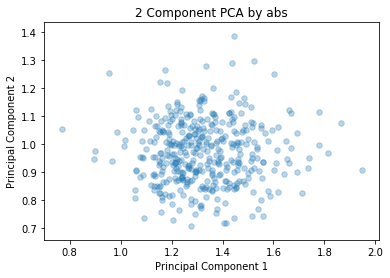

In [12]:
x = np.array(x)
y = np.array(y)

plt.scatter(x,y, s = 30, alpha=0.3)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 Component PCA by abs')

plt.show()

In [13]:
# calculate the distance between A and B points;
# A : array, B : array
def eucliDist(A,B):
    return math.sqrt(sum([(a - b)**2 for (a,b) in zip(A,B)]))

# distance table to recorder the distance between two different data points
dist_matrix = np.zeros((biclusters_num, biclusters_num))
for i in range(biclusters_num):
    for j in range(biclusters_num):
        # assign value to dist
        dist_matrix[i,j] = eucliDist(PCA_dict_clusters[list(PCA_dict_clusters.keys())[i]]
                              , PCA_dict_clusters[list(PCA_dict_clusters.keys())[j]])
# print(PCA_dict_clusters.keys())

In [14]:
# dist_matrix
dist_matrix = dist_matrix.tolist()

In [15]:
# save weights for each length
path_length = []
# save the vertex that has been visited to prevent revisit again
path_vertexs = []
# real routes 
path = []

def find_path(j, vertex_len):
    
    path_vertexs.append(j)  
    row = dist_matrix[j]

    # copy_row: delete the vertex that has been visited --> prevent to operate it in the original rows directly
    copy_row = [value for value in row]

    walked_vertex = []

    # save the vertex that has been visited to walked vertex
    for i in path_vertexs:
        walked_vertex.append(copy_row[i])

    #  remove the vertex that has been visited in the copy_row
    for vertex in walked_vertex:
        copy_row.remove(vertex)

    # find the shortest value that never accessed in the row
    if len(path_vertexs) < vertex_len:
        min_e = min(copy_row)
        j = row.index(min_e)
        path_length.append(min_e)
        find_path(j, vertex_len)
    else:
        min_e = dist_matrix[j][0]
        path_length.append(min_e)
        path_vertexs.append(0)
    return path_vertexs, path_length


def print_path(vertexs, lengths):
    
    vertexs = [vertex + 1 for vertex in vertexs]
    for i, vertex in enumerate(vertexs):
        path.append(vertex)
        
        if i == len(dist_matrix):
            break
        
    print("the smallest total value is：", sum(lengths))
    print("path is：", path)

path_vertexs, path_length = find_path(0, len(dist_matrix))
print_path(path_vertexs, path_length)

the smallest total value is： 12.840806590017666
path is： [1, 190, 291, 171, 70, 164, 11, 167, 267, 47, 73, 27, 91, 198, 394, 266, 358, 50, 188, 30, 29, 229, 205, 169, 211, 174, 269, 259, 93, 348, 176, 151, 200, 113, 117, 219, 293, 372, 281, 57, 148, 58, 135, 168, 306, 346, 236, 309, 322, 68, 305, 45, 220, 302, 380, 308, 379, 392, 360, 264, 207, 94, 212, 110, 287, 133, 39, 65, 397, 150, 376, 43, 356, 359, 248, 72, 119, 147, 193, 56, 318, 2, 161, 87, 391, 290, 321, 253, 144, 335, 232, 82, 265, 261, 278, 252, 344, 311, 213, 233, 107, 383, 96, 98, 137, 19, 83, 127, 389, 24, 38, 145, 326, 33, 285, 14, 231, 141, 341, 336, 268, 324, 195, 296, 250, 276, 160, 84, 304, 239, 340, 114, 59, 378, 224, 206, 315, 129, 115, 355, 37, 10, 237, 162, 35, 187, 216, 51, 242, 273, 116, 180, 363, 156, 327, 134, 153, 218, 44, 181, 159, 297, 67, 289, 203, 375, 80, 377, 271, 64, 235, 136, 16, 128, 74, 367, 347, 165, 399, 124, 185, 142, 125, 301, 8, 120, 13, 339, 369, 310, 26, 241, 223, 222, 157, 329, 295, 270, 22

In [19]:
# put the selected 400 biclusters into a new dict biclusters
# refactor name and index to make it easy to be found in the next stage
new_dict_biclusters = {}

k = 1
for i in selection_index:
    new_dict_biclusters[k] = dict_clusters[str(i)]
    k += 1
# print(new_dict_biclusters)

{1: [['1', '2', '26', '63', '296', '303', '327', '344', '345', '378', '416', '486', '592', '654', '655', '676', '854', '894', '936'], ['1', '13', '50', '100', '255', '258', '269']], 2: [['1', '2', '6', '43', '130', '271', '286', '293', '296', '297', '378', '393', '416', '454', '487', '514', '624', '630', '653', '655', '682', '796', '880', '894', '919', '936'], ['1', '50', '100', '111', '237', '257', '258', '272']], 3: [['1', '2', '58', '293', '344', '416', '624', '630', '655', '682', '768', '936'], ['1', '25', '50', '100', '111', '127', '237', '255', '272']], 4: [['1', '2', '15', '26', '296', '299', '327', '416', '486', '533', '548', '592', '655', '854', '936'], ['1', '13', '14', '50', '127', '237', '255', '257']], 5: [['1', '2', '26', '58', '89', '268', '271', '286', '303', '327', '343', '360', '416', '463', '486', '655', '854', '936'], ['1', '13', '25', '50', '100', '127', '257', '269']], 6: [['1', '2', '26', '58', '63', '104', '119', '178', '192', '303', '327', '378', '416', '486', 

In [21]:
states = np.zeros((biclusters_rows, biclusters_cols))

# recorder the index of path array
k = 0

increment = range (1,int(biclusters_cols),1)
decrement = range (int(biclusters_cols-1),0,-1)

states[0][0] = path[k]

for row in range(biclusters_rows):
    if row % 2 == 0:
        cols = increment
    elif row % 2 == 1:
        cols = decrement
    
    for col in cols:
        k += 1
        states[row][col] = path[k]
        
for j in range(19, 0, -1):
    k += 1
    states[j][0] = path[k]
    
# print(states)

# test biclustering

In [ ]:
test = ratingsBinary[0:20, 0:10]
# test

In [ ]:
df = DataFrame(test)
df.to_csv('test_binary.csv', index = False, header = False)

In [ ]:
# read file from matlab which generates biclustering files
filename = "tt.csv"
cluster_no = 0

clusters_number = 22

f = open(filename)

# create sub matrix to record biclustering
for i in range(0, clusters_number):
    rows = f.readline().split()
    cols = f.readline().split()

    
    i = np.zeros((len(rows), len(cols)))
   
 
    row_count = 0
    for j in rows:  
        col_count = 0
        for k in cols:
            
            i[row_count, col_count] = ratings[int(j)-1,int(k)-1]
            col_count += 1
        row_count += 1    
        col_count = 0        
    # print(i)
f.close()